In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fs = 4
total_time = 10
Ts = 1.0 / fs
N = int(total_time * fs)
t = np.arange(N)*Ts

dc = 5*np.ones(N)
comp1hz = 2*np.cos(2*np.pi*t-np.pi/2)
comp2hz = 3*np.cos(4*np.pi*t)

x = dc + comp1hz + comp2hz

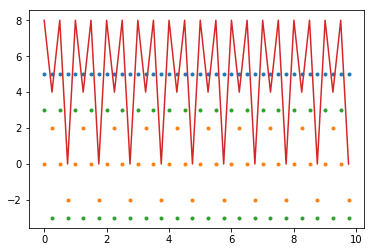

In [20]:
plt.plot(t, dc, '.')
plt.plot(t, comp1hz, '.')
plt.plot(t, comp2hz, '.')
plt.plot(t, x)
plt.show()

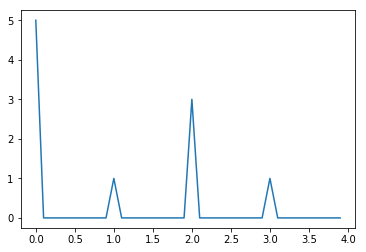

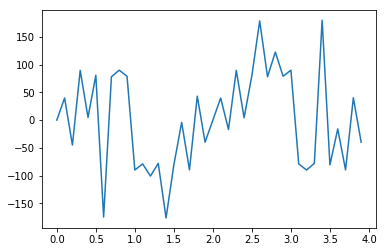

In [26]:
# co tin hieu x[0]...x[N-1]
# tim cac tan so, pha cua cac tin hieu tuan hoan tao nen x

from numpy.fft import fft
X = fft(x)
Xabs = np.abs(X)
Xangle = np.angle(X)

plt.plot(np.arange(N)/N*fs, Xabs/N)

plt.figure()
plt.plot(np.arange(N)/N*fs, Xangle*180.0/np.pi)

plt.show()


In [27]:
from IPython.display import Audio
Audio('data/nightingale.wav')

In [29]:
fs = 44100
Ts = 1.0/fs
N = int(2*fs)
A = 1.0
f = 440

t = np.arange(N)*Ts
x = A * np.cos(2*np.pi*f*t)
#plt.plot(t, x)
#plt.show()
Audio(data=x, rate=fs)

In [30]:
fall = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
fs = 44100
Ts = 1.0/fs
N = int(1*fs)
A = 1.0

xall = []
for f in fall:
    t = np.arange(N)*Ts
    x = A * np.cos(2*np.pi*f*t)
    xall.append(x)
x = np.hstack(xall)
#plt.plot(t, x)
#plt.show()
Audio(data=x, rate=fs)